In [ ]:
# Damped Pendulum Simulation

This notebook simulates a damped pendulum using numerical integration (Runge-Kutta 2nd order).

We explore the motion of a pendulum with damping and visualize the angle over time.

In [9]:
import numpy as np
import matplotlib.pyplot as plt


In [1]:
class DampedPendulum:
    def __init__(self, length=1.0, mass=1.0, damping=0.1, g=9.81, theta0=0.5, omega0=0.0, dt=0.01, t_max=10):
        self.L = length
        self.m = mass
        self.b = damping
        self.g = g
        self.theta = theta0
        self.omega = omega0
        self.dt = dt
        self.t_max = t_max

    def simulate(self):
        n_steps = int(self.t_max / self.dt)
        theta_array = np.zeros(n_steps)
        omega_array = np.zeros(n_steps)
        time = np.linspace(0, self.t_max, n_steps)

        for i in range(n_steps):
            theta_array[i] = self.theta
            omega_array[i] = self.omega
            # Runge-Kutta 2nd order
            k1 = self.dt * self.omega
            l1 = self.dt * (- (self.b/self.m)*self.omega - (self.g/self.L)*np.sin(self.theta))
            k2 = self.dt * (self.omega + l1)
            l2 = self.dt * (- (self.b/self.m)*(self.omega + l1) - (self.g/self.L)*np.sin(self.theta + k1))
            self.theta += 0.5*(k1 + k2)
            self.omega += 0.5*(l1 + l2)

        return time, theta_array


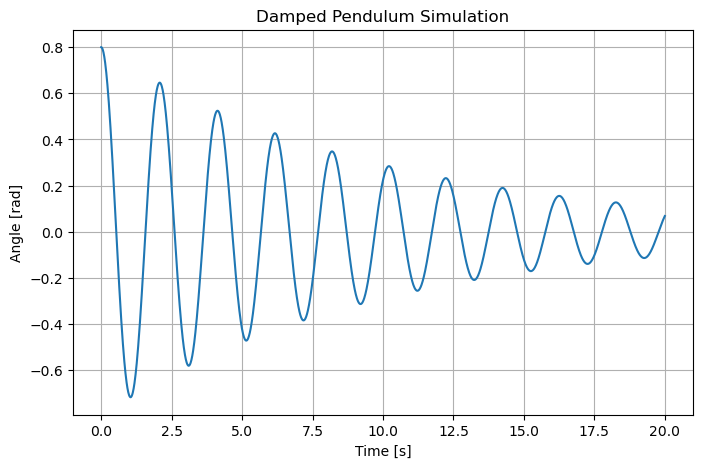

In [13]:
# Skapa pendel
pendulum = DampedPendulum(damping=0.2, theta0=0.8, t_max=20)

# Simulera
t, theta = pendulum.simulate()

# Visualisera
plt.figure(figsize=(8,5))
plt.plot(t, theta)
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.title("Damped Pendulum Simulation")
plt.grid(True)
plt.show()


## Learning Outcomes

- Implemented numerical integration for a damped pendulum
- Visualized motion using Matplotlib
- Practiced structuring Python code in a class
